<a href="https://colab.research.google.com/github/aadya-chopra/Internship-Kernel/blob/main/Internship_task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
# Load the dataset
df = pd.read_csv("/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# information about the dataset
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Check for missing values
print(df.isnull().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


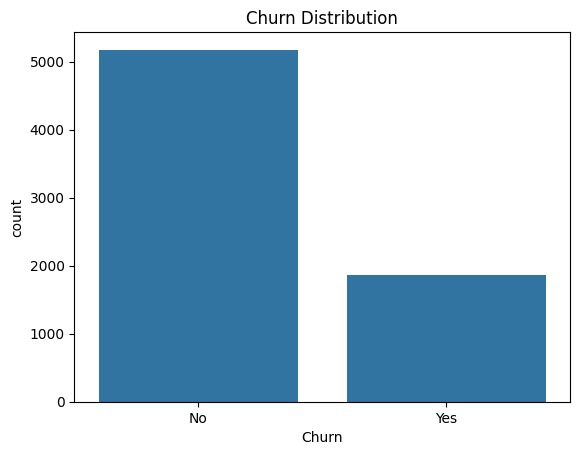

In [ ]:
# Plot churn distribution
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


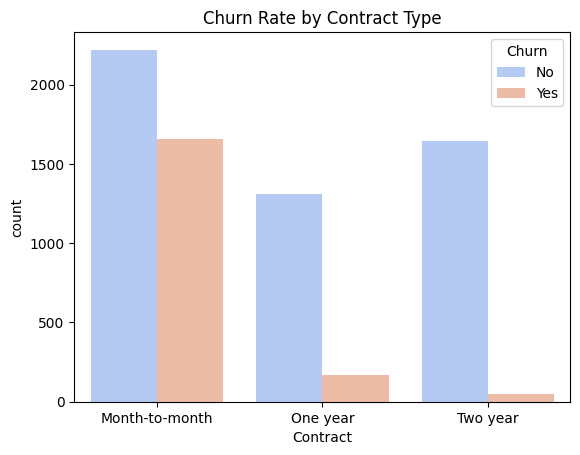

In [ ]:
sns.countplot(x="Contract", hue="Churn", data=df, palette="coolwarm")
plt.title("Churn Rate by Contract Type")
plt.show()


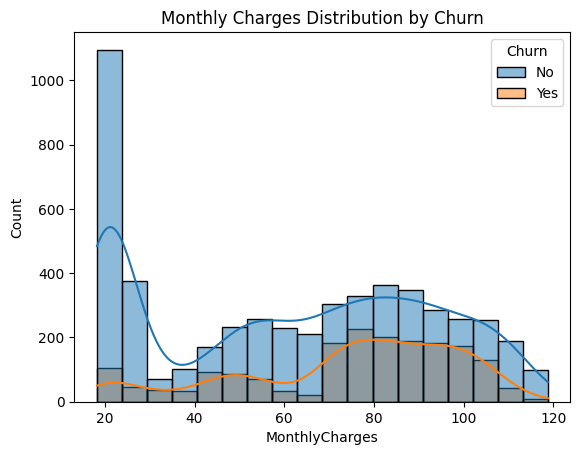

In [ ]:
sns.histplot(df, x="MonthlyCharges", hue="Churn", kde=True)
plt.title("Monthly Charges Distribution by Churn")
plt.show()


In [ ]:
#dropping as it is not relevant
df.drop(["customerID"], axis=1, inplace=True)  # Remove ID column


In [ ]:
#converting values
binary_cols = ["gender", "Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
for col in binary_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})

df["SeniorCitizen"] = df["SeniorCitizen"].astype(int)  # Already numeric


In [ ]:
df = pd.get_dummies(df, drop_first=True)


In [ ]:
scaler = StandardScaler()
df[["MonthlyCharges", "TotalCharges", "tenure"]] = scaler.fit_transform(df[["MonthlyCharges", "TotalCharges", "tenure"]])


In [ ]:
# Training the model
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)


In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[938  98]
 [192 181]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.49      0.56       373

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409


Accuracy Score: 0.794180269694819


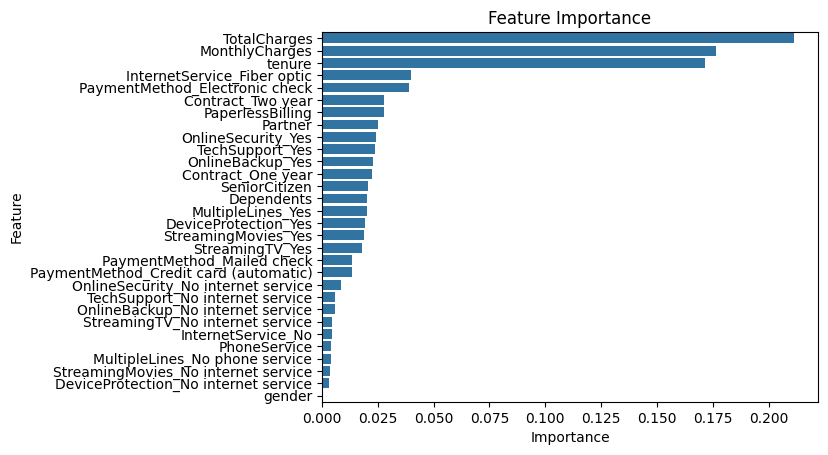

In [ ]:
#Feature Importance
importances = pd.DataFrame({"Feature": X.columns, "Importance": rf.feature_importances_}).sort_values(by="Importance", ascending=False)

sns.barplot(x="Importance", y="Feature", data=importances)
plt.title("Feature Importance")
plt.show()


In [ ]:
# Create a DataFrame to compare actual vs predicted values
results_df = pd.DataFrame({"Actual Churn": y_test, "Predicted Churn": y_pred})

# Show first 10 predictions
print(results_df.head(10))


      Actual Churn  Predicted Churn
185              1                1
2715             0                0
3825             0                0
1807             1                1
132              0                0
1263             1                0
3732             0                0
1672             0                0
811              1                0
2526             1                1


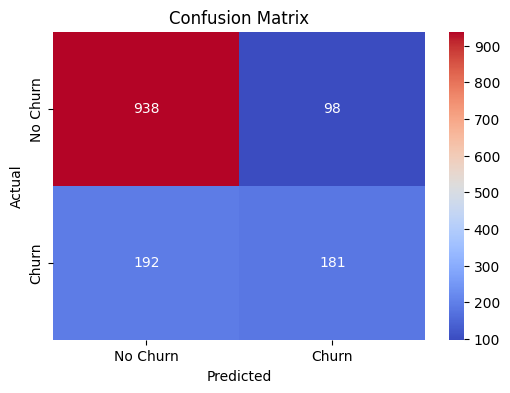

In [ ]:
#visualizing confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


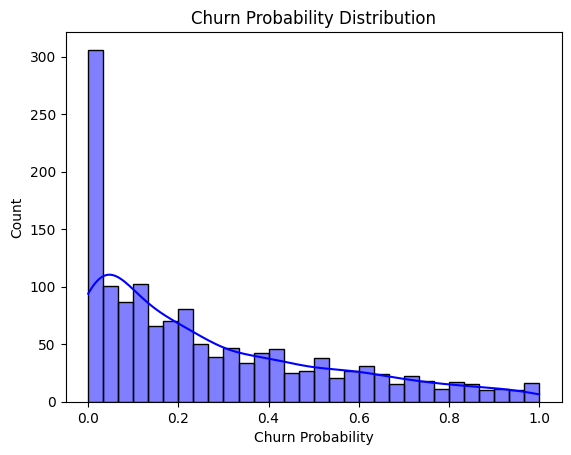

In [ ]:
# Get probability predictions (if using RandomForest or any probabilistic model)
y_probs = rf.predict_proba(X_test)[:, 1]  # Probability of churn

# Plot distribution
sns.histplot(y_probs, bins=30, kde=True, color="blue")
plt.title("Churn Probability Distribution")
plt.xlabel("Churn Probability")
plt.ylabel("Count")
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 0 non-null      float64
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   float64
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   bool   
 11  Mult

In [ ]:
df['Churn'].unique()

array([0, 1])